# Table of Contents
## 1 Import Libraries 
## 2 Import data set 
## 3 Elbow Technique 
## 4 K-means clustering 
## 5 Descriptive Statistics

# 1 Import Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import os 
import sklearn 
from sklearn.cluster import KMeans 
import pylab as pl

# 2 Import data set

In [2]:
path = r'C:\Users\ctede\OneDrive\Desktop\World University Rankings Analysis'

In [3]:
#import CWUR data set
CWUR = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'CWUR_new_cols.pkl'))

In [4]:
CWUR.shape

(2200, 15)

In [5]:
CWUR.head()

,world_rank,university_name,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,region,Rank Category
0,1,Harvard University,United States,1,7,9,1,1,1,1,5,100.00,2012,North America,Top 50
1,2,Massachusetts Institute of Technology,United States,2,9,17,3,12,4,4,1,91.67,2012,North America,Top 50
2,3,Stanford University,United States,3,17,11,5,4,2,2,15,89.50,2012,North America,Top 50
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Europe,Top 50
4,5,California Institute of Technology,United States,4,2,29,7,37,22,22,18,85.21,2012,North America,Top 50


In [6]:
CWUR.dtypes

world_rank                int64
university_name          object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
patents                   int64
score                   float64
year                      int64
region                   object
Rank Category            object
dtype: object

In [7]:
#AWUR['university_name'] = AWUR['university_name'].astype('str')
#Change data type of score 
CWUR['score'] = CWUR['score'].astype('int')

In [8]:
CWUR.dtypes

world_rank               int64
university_name         object
country                 object
national_rank            int64
quality_of_education     int64
alumni_employment        int64
quality_of_faculty       int64
publications             int64
influence                int64
citations                int64
patents                  int64
score                    int32
year                     int64
region                  object
Rank Category           object
dtype: object

- Categorical variables: univeristy_name, country, region, rank category 
- Numerical variables: world_rank, national_rank, quality of education, alumni employment, quality of faculty, publications, influence, citations, patents, year, score

In [9]:
#Create a subset to drop the categorical variables 
columns = ["world_rank", "quality_of_education", "quality_of_faculty", "publications", "influence", "citations", "patents", "score"]

In [10]:
df = CWUR[columns]

In [11]:
df.head()

,world_rank,quality_of_education,quality_of_faculty,publications,influence,citations,patents,score
0,1,7,1,1,1,1,5,100
1,2,9,3,12,4,4,1,91
2,3,17,5,4,2,2,15,89
3,4,10,4,16,16,11,50,86
4,5,2,7,37,22,22,18,85


In [12]:
#Check data types
df.dtypes

world_rank              int64
quality_of_education    int64
quality_of_faculty      int64
publications            int64
influence               int64
citations               int64
patents                 int64
score                   int32
dtype: object

In [13]:
#Check ranges for each variable 
df.describe()

,world_rank,quality_of_education,quality_of_faculty,publications,influence,citations,patents,score
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,275.100455,178.888182,459.908636,459.797727,413.417273,433.346364,47.338182
std,304.320363,121.935100,64.050885,303.760352,303.331822,264.366549,273.996525,7.756714
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.000000
25%,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,170.750000,44.000000
50%,450.500000,355.000000,210.000000,450.500000,450.500000,406.000000,426.000000,45.000000
75%,725.250000,367.000000,218.000000,725.000000,725.250000,645.000000,714.250000,47.000000
max,1000.000000,367.000000,218.000000,1000.000000,991.000000,812.000000,871.000000,100.000000


# 3 Elbow Technique

In [14]:
num_cl = range(1, 10) #potential number of clusters = 10
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

In [16]:
score

[-969508418.1422732,
 -354804993.26472396,
 -246145161.8640846,
 -207314107.38680056,
 -181379865.58138895,
 -164263760.40980968,
 -148644038.10214087,
 -138711063.83325744,
 -130853177.72776659]

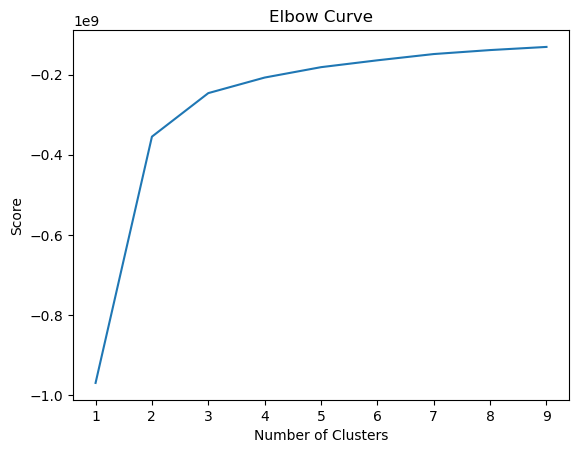

In [17]:
#Plot the elbow curve 
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The number of clusters that I will use for the k-means algorithm is three (3). Between the clusters 2 and 3 the score continues to increase, and after 3, the scores begin to level out. 

# 4 K-means clustering

In [18]:
#Create the k-means object 
kmeans = KMeans(n_clusters = 3)

In [19]:
kmeans.fit(df)

KMeans(n_clusters=3)

In [20]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\ctede\AppData\Local\Temp\ipykernel_13740\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [21]:
df.head()

,world_rank,quality_of_education,quality_of_faculty,publications,influence,citations,patents,score,clusters
0,1,7,1,1,1,1,5,100,1
1,2,9,3,12,4,4,1,91,1
2,3,17,5,4,2,2,15,89,1
3,4,10,4,16,16,11,50,86,1
4,5,2,7,37,22,22,18,85,1


### Create visualizations (scatterplots)

Text(0, 0.5, 'World Rank')

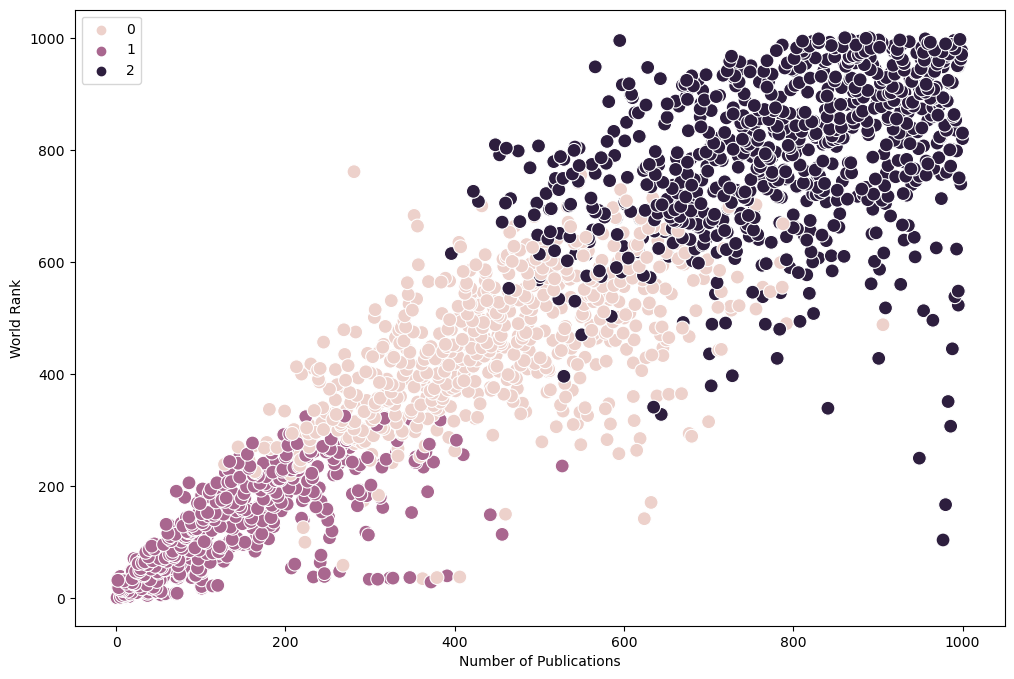

In [22]:
#Plot the world rank and publications variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['publications'], y=df['world_rank'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of Publications')
plt.ylabel('World Rank')

### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

In general: There are universities that have a world rank that may not be affected by the number of publications. 

Medium purple cluster "1" 
- Majority of the data exists within the 200 publications and the 200 university world rank (as seen in the previous exercise density plot for both publications and world rank). 
    - The universities in this area have a high rank (below 200 worldwide) and the number of publications range from 0 to 200. 
- There are exceptions to this. The medium purple data points between 300 and 400 publications also have a high world rank.

Light pink cluster "0"
- Similarly to the medium purple cluster, the light pink cluster also shows that the number of publications does not necessarily mean a higher or lower world ranking for a university. There are universities that have a rank of 400, but the number of publications for this specfic world rank ranges from 200 to ~700. There is no obvious pattern or relationship between the number of publications and world rank. 

Dark purple cluster "2" 
- These data points are more spread out than the other two clusters (a lot of variety in the data for this cluster).

Text(0, 0.5, 'World Rank')

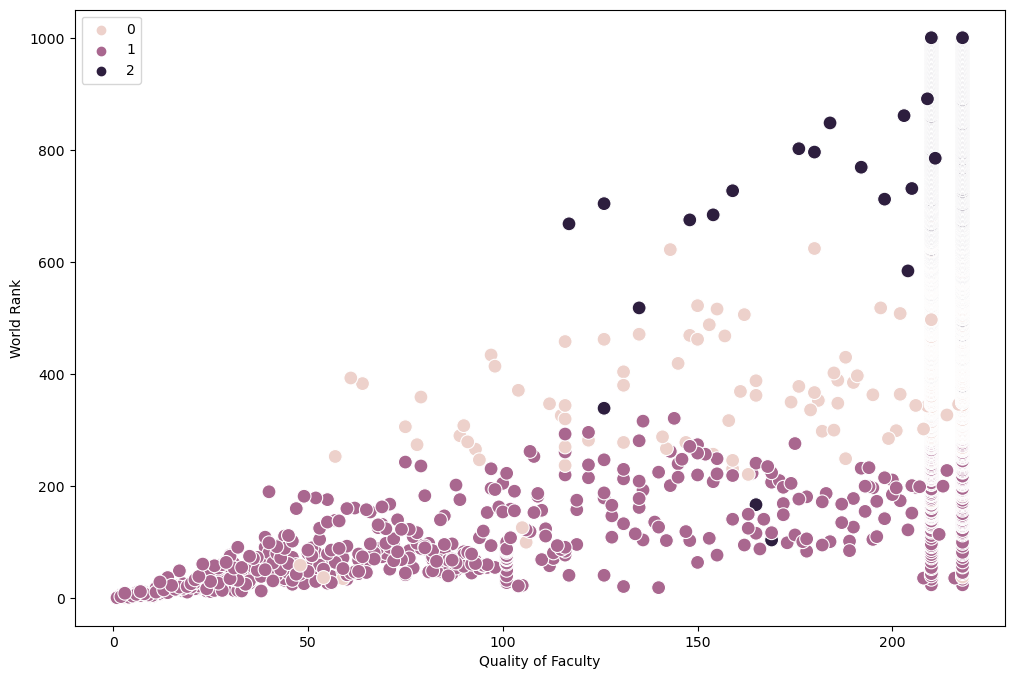

In [23]:
#Plot the world rank and quality of faculty variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['quality_of_faculty'], y=df['world_rank'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Quality of Faculty')
plt.ylabel('World Rank')

### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

The data location of the data points (within 200 for quality of faculty and 200 world rank) is consistent with the density plots from the previous exercise. 

Medium purple cluster "1"
- Majority of the data points are between 0 and 100 for the quality of faculty, additionally the world rank for this data is between 0 and 200. 
- Outside of this range there are data points that become more spread out as the quality of faculty increases. For example, as the quality of faculty increases, a university's rank ranges from ~0 to ~300. 
- This indicates that the quality of faculty could be used as an indicator for a high/top world rank for a university but only within a certain threshold (below a value of 200 for a quality of faculty). 

Light pink cluster "0" 
- This cluster has data points more spread out than the medium purple cluster. 
- Since the data is so spread, there is no clear pattern.

Dark purple cluster "2" 
- This cluster is the most spread out and has the least data points

# 5 Descriptive Statistics

In [24]:
#Create a cluster column for each of the colors
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'medium purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\ctede\AppData\Local\Temp\ipykernel_13740\3793032874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'


In [25]:
#Descriptive stats 
df.groupby('cluster').agg({'world_rank':['count','mean', 'median','max'], 
                          'quality_of_education':['mean', 'median'],
                          'quality_of_faculty':['mean', 'median'], 
                          'publications':['mean','median'],
                          'influence':['mean','median'],
                          'citations':['mean','median'],
                          'patents':['mean','median'],
                          'score':['mean','median']})

world_rank                          quality_of_education         \
                   count        mean median   max                 mean median   
cluster                                                                         
dark purple          790  790.791139  803.0  1000           343.903797  355.0   
light pink           683  444.462665  442.0   761           321.102489  355.0   
medium purple        727  113.902338   92.0   325           157.116919  101.0   

              quality_of_faculty        publications          influence  \
                            mean median         mean median        mean   
cluster                                                                   
dark purple           213.077215  214.5   788.106329  802.5  775.000000   
light pink            205.852123  210.0   442.764275  435.0  455.600293   
medium purple         116.404402  101.0   119.376891  101.0  121.224209   

                       citations            patents             score         
              median        mean median        mean median       mean median  
cluster                                                                       
dark purple    793.0  662.691139  645.0  636.625316  701.5  44.037975   44.0  
light pink     439.0  440.711567  406.0  480.090776  481.0  44.885798   45.0  
medium purple  101.0  116.899587   99.0  168.536451  101.0  53.228336   49.0

### Propose what these results could be useful for in future steps of an analytics pipeline.

The medium purple cluster has the best world rank median and mean (out of the other colored clusters). In this cluster, the median world rank is 92 (which means that the median rank for a university in this cluster is 92 out of 325 - the max rank for the entire world rank variable is 1000). The mean for this cluster is an average world rank of ~114. A rank of 114 is significantly better than 442 and 789. 
- I added the count to the world rank variable to see how much data is included in each cluster. The medium purple cluster did not have the max or min count. This indicates that majority of the data is actually not included in this cluster (as previously thought). The medium purple cluster represents about 33% of the data (725 / 2200) - which makes sense since we have 3 clusters.

Within the medium purple cluster, all of the indicators (quality of education, faculty, publications, influence, citations, and patents) have the lowest median and mean when compared to the other clusters. The other clusters have values that are significantly larger than the values for the medium purple cluster. This indicates that the higher these values (for any of the indicators listed) are, the world rank gets worse and worse. 

The exception to this is the score. The mean and median score are higher for the medium purple cluster than the other two clusters. The average and median scores for the other two clusters are very similar to one another. This observation indicates that the higher the score, the better the world ranking. This supports my use of the score instead of the world rank when looking for relationships between variables in previous exercises. 

Text(0, 0.5, 'Score')

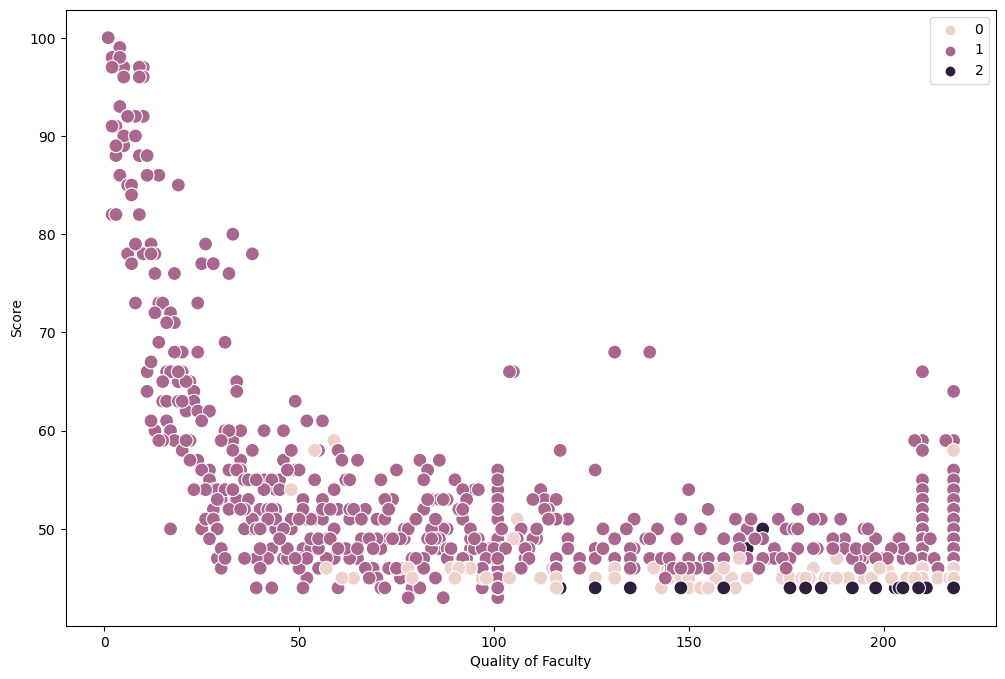

In [26]:
#Plot the score and quality of faculty variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['quality_of_faculty'], y=df['score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Quality of Faculty')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

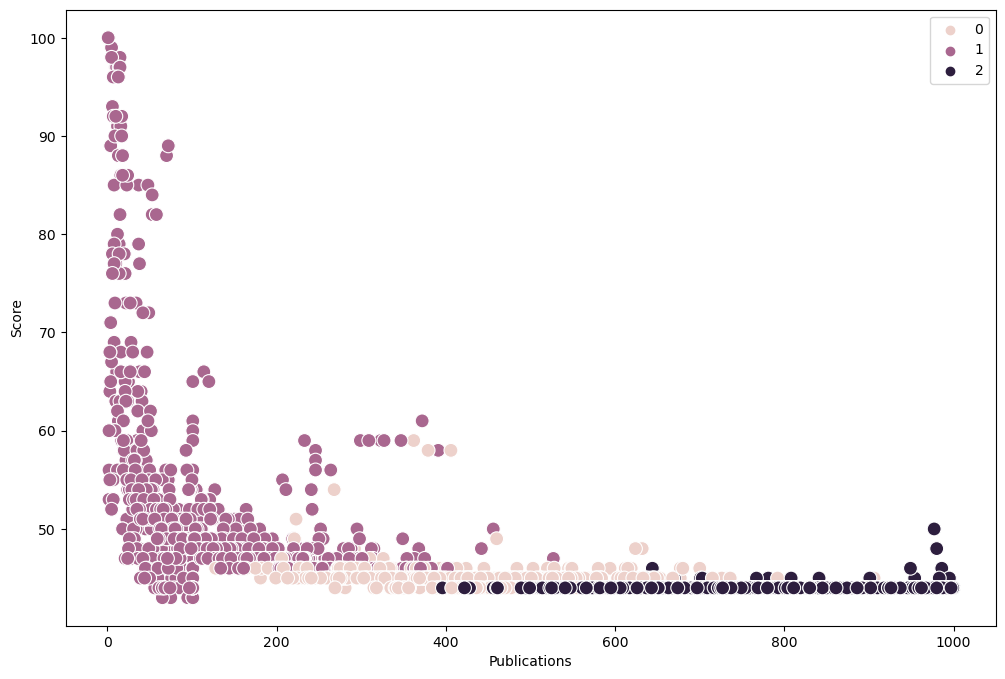

In [27]:
#Plot the score and quality of faculty variables 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['publications'], y=df['score'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Publications')
plt.ylabel('Score')

# Export cluster dataframe for Tableau

In [28]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'CWUR_cluster.csv'))